In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv('Mumbai House Prices.csv')
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [4]:
df1.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [6]:
df1.groupby('type')['type'].agg('count')

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [7]:
df1.groupby('status')['status'].agg('count')

status
Ready to move         44982
Under Construction    31056
Name: status, dtype: int64

In [8]:
df2 = df1.copy()

In [9]:
df2.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [10]:
def convert_price_to_inr(price, unit):
    if unit == 'L':
        return price * 1e5  # 1 Lakh = 100,000
    elif unit == 'Cr':
        return price * 1e7  # 1 Crore = 10,000,000
    else:
        return np.nan
    

In [11]:
df2['price_in_inr'] = df2.apply(lambda x: convert_price_to_inr(x['price'], x['price_unit']), axis=1)
df2.head()

,bhk,type,locality,area,price,price_unit,region,status,age,price_in_inr
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,5998000.0
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,9411000.0


In [12]:
df3 = df2.drop(columns=['price', 'price_unit'])
df3.head()


,bhk,type,locality,area,region,status,age,price_in_inr
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000.0


In [13]:
df3.shape


(76038, 8)

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bhk           76038 non-null  int64  
 1   type          76038 non-null  object 
 2   locality      76038 non-null  object 
 3   area          76038 non-null  int64  
 4   region        76038 non-null  object 
 5   status        76038 non-null  object 
 6   age           76038 non-null  object 
 7   price_in_inr  76038 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 4.6+ MB


In [15]:
df4 = df3.copy()
df4['Price_Sqft'] = df4['price_in_inr']/df4['area']
df4.head(10)

,bhk,type,locality,area,region,status,age,price_in_inr,Price_Sqft
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000.0,36496.350365
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000.0,8204.687500
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000.0,28360.655738
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000.0,6847.031963
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000.0,14280.728376
5,2,Apartment,Bhoomi Simana Wing A Phase 1,826,Parel,Under Construction,New,33000000.0,39951.573850
6,5,Villa,Agami Estancia,2921,Boisar,Under Construction,New,19900000.0,6812.735365
7,3,Apartment,Sanghvi Infenia,778,Santacruz East,Under Construction,New,28900000.0,37146.529563
8,1,Apartment,Shubh Shreeji Heights,396,Badlapur East,Ready to move,New,2984000.0,7535.353535
9,2,Apartment,Aplite Greenstone Heritage,671,Fort,Under Construction,New,27200000.0,40536.512668


In [16]:
print(len(df4.locality.unique()))
print(len(df4.region.unique()))

9782
228


In [17]:
df5 = df4.drop(columns=['locality'])
df5.head()

,bhk,type,area,region,status,age,price_in_inr,Price_Sqft
0,3,Apartment,685,Andheri West,Ready to move,New,25000000.0,36496.350365
1,2,Apartment,640,Naigaon East,Under Construction,New,5251000.0,8204.687500
2,2,Apartment,610,Borivali West,Under Construction,New,17300000.0,28360.655738
3,2,Apartment,876,Panvel,Under Construction,New,5998000.0,6847.031963
4,2,Apartment,659,Mira Road East,Under Construction,New,9411000.0,14280.728376


In [18]:
region_stats = df5.groupby('region')['region'].agg('count').sort_values(ascending=False)
region_stats

region
Thane West             14868
Mira Road East          9902
Dombivali               3041
Kandivali East          2568
Kharghar                2362
                       ...  
Rambaug                    1
Police Colony              1
Pestom Sagar Colony        1
Pen                        1
vile parle west            1
Name: region, Length: 228, dtype: int64

In [19]:
len(region_stats[region_stats<=20])

125

In [20]:
region_less_than_20 = region_stats[region_stats<=20]
region_less_than_20

region
Virar West             19
Napeansea Road         19
Taloje                 18
Patlipada              17
Kasheli                17
                       ..
Rambaug                 1
Police Colony           1
Pestom Sagar Colony     1
Pen                     1
vile parle west         1
Name: region, Length: 125, dtype: int64

In [21]:
len(df5.region.unique())

228

In [22]:
df5.region = df5.region.apply(lambda x : 'other' if x in region_less_than_20 else x)
len(df5.region.unique())

104

In [23]:
df5.head(10)

,bhk,type,area,region,status,age,price_in_inr,Price_Sqft
0,3,Apartment,685,Andheri West,Ready to move,New,25000000.0,36496.350365
1,2,Apartment,640,Naigaon East,Under Construction,New,5251000.0,8204.687500
2,2,Apartment,610,Borivali West,Under Construction,New,17300000.0,28360.655738
3,2,Apartment,876,Panvel,Under Construction,New,5998000.0,6847.031963
4,2,Apartment,659,Mira Road East,Under Construction,New,9411000.0,14280.728376
5,2,Apartment,826,Parel,Under Construction,New,33000000.0,39951.573850
6,5,Villa,2921,Boisar,Under Construction,New,19900000.0,6812.735365
7,3,Apartment,778,Santacruz East,Under Construction,New,28900000.0,37146.529563
8,1,Apartment,396,Badlapur East,Ready to move,New,2984000.0,7535.353535
9,2,Apartment,671,other,Under Construction,New,27200000.0,40536.512668


In [24]:
df5[df5.area/df5.bhk < 160].head()

,bhk,type,area,region,status,age,price_in_inr,Price_Sqft
17576,1,Apartment,136,Ulwe,Under Construction,New,3100000.0,22794.117647
20784,1,Apartment,127,Mira Road East,Under Construction,New,5900000.0,46456.692913
20791,1,Apartment,157,Mira Road East,Under Construction,New,5950000.0,37898.089172
23438,1,Apartment,127,Mira Road East,Under Construction,New,5900000.0,46456.692913
23445,1,Apartment,157,Mira Road East,Under Construction,New,5950000.0,37898.089172


In [25]:
df5.shape

(76038, 8)

In [26]:
df5.Price_Sqft.describe()

count     76038.000000
mean      15118.812074
std        9332.899565
min         646.766169
25%        8571.428571
50%       13000.000000
75%       19496.115827
max      182307.692308
Name: Price_Sqft, dtype: float64

In [27]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.Price_Sqft)
        st = np.std(subdf.Price_Sqft)
        reduced_df = subdf[(subdf.Price_Sqft>(m-st)) & (subdf.Price_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(57424, 8)

In [28]:
df6.describe()

,bhk,area,price_in_inr,Price_Sqft
count,57424.000000,57424.000000,5.742400e+04,57424.000000
mean,1.991519,1030.250610,1.563310e+07,14202.243495
std,0.900428,638.017737,1.769512e+07,8041.798475
min,1.000000,150.000000,9.000000e+05,1079.812207
25%,1.000000,650.000000,6.400000e+06,8333.333333
50%,2.000000,900.000000,1.080000e+07,12364.425163
75%,3.000000,1187.000000,1.880000e+07,18333.333333
max,10.000000,16000.000000,5.555000e+08,62857.142857


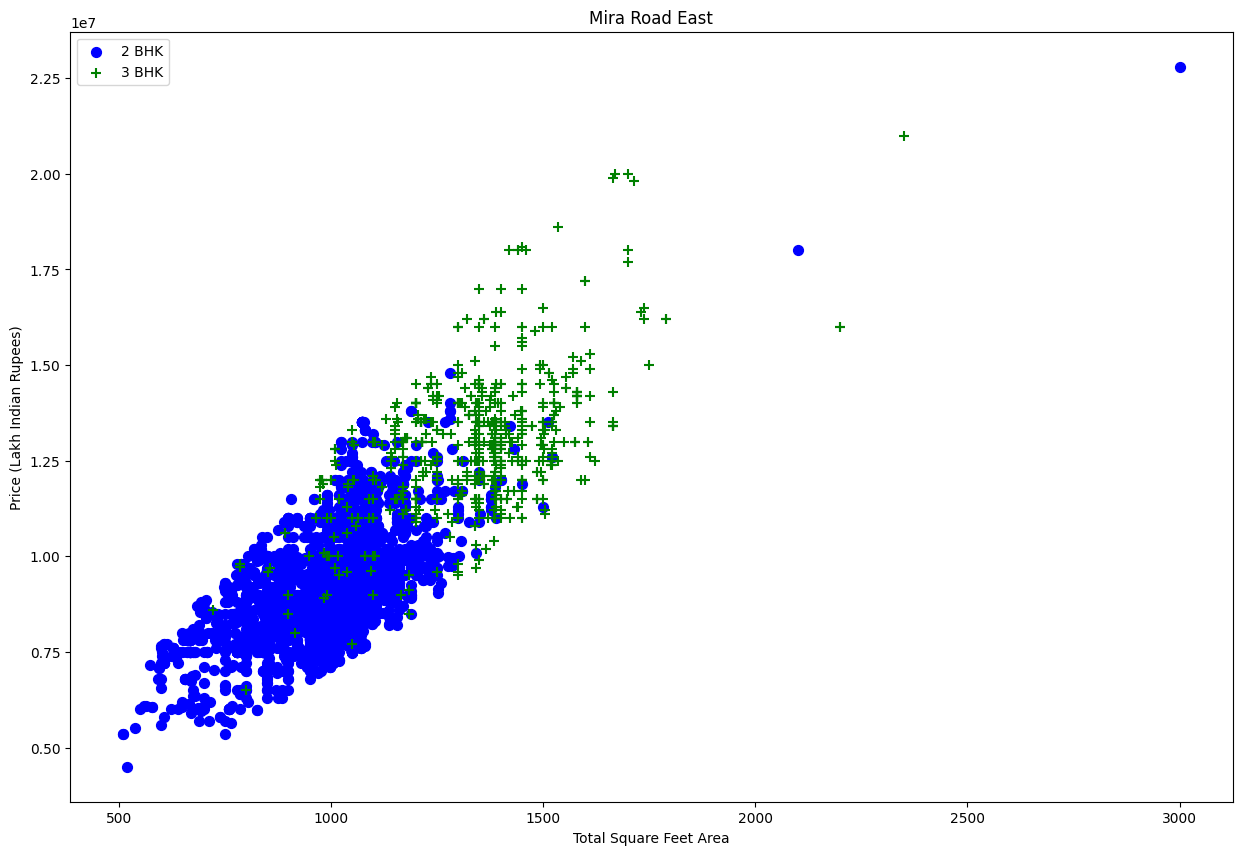

In [29]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.region==location) & (df.bhk==2)]
    bhk3 = df[(df.region==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price_in_inr,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price_in_inr,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Mira Road East")

Text(0, 0.5, 'Count')

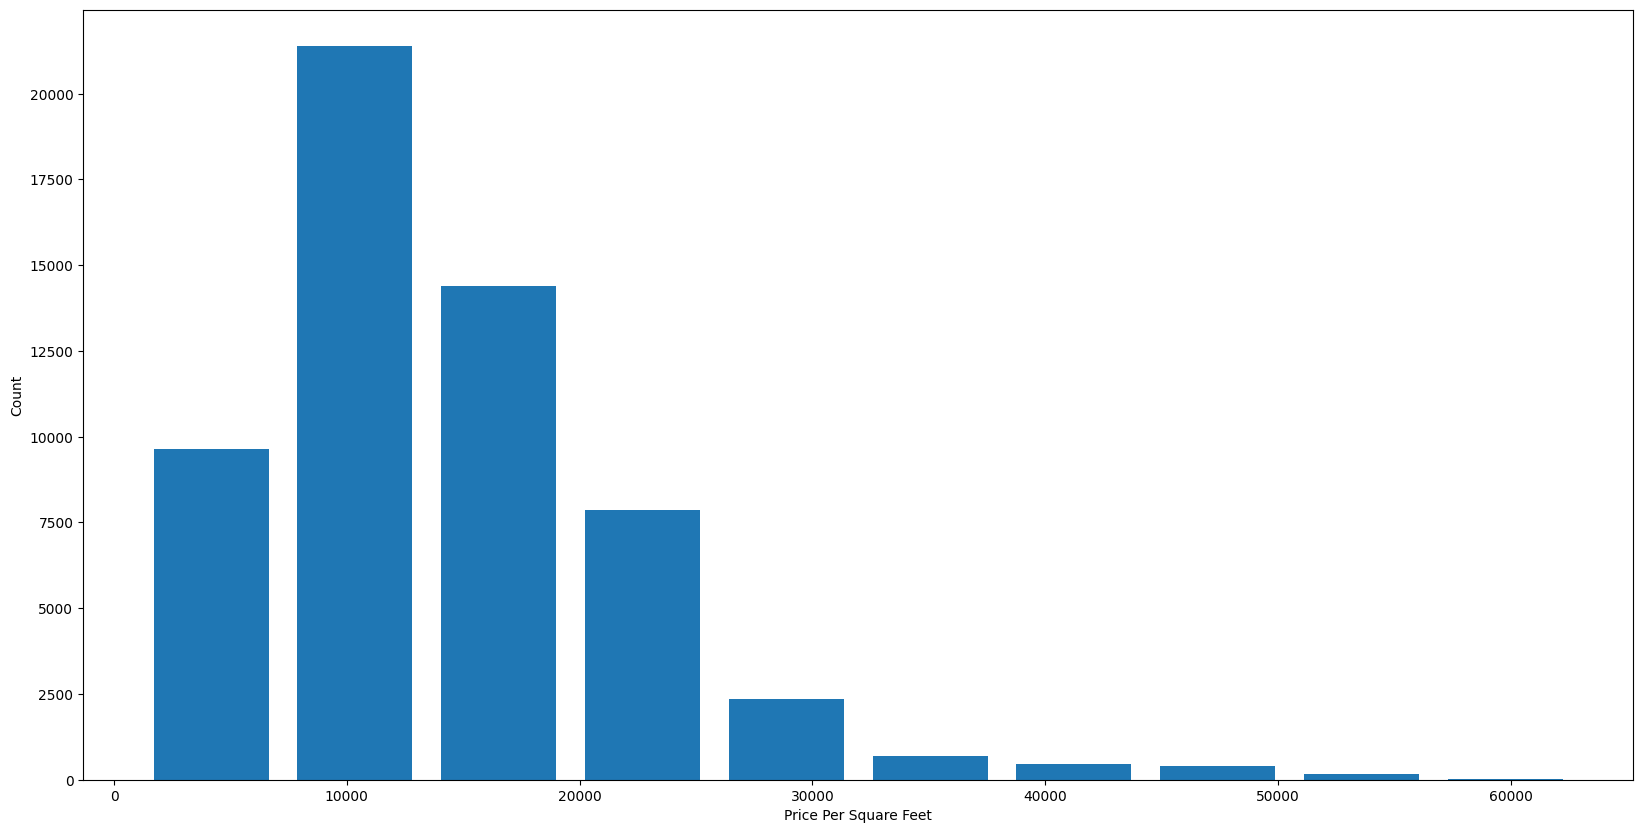

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.Price_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
df7 = df6.drop(['Price_Sqft'], axis=1)
df7.head()

,bhk,type,area,region,status,age,price_in_inr
0,2,Apartment,650,Agripada,Under Construction,Resale,26200000.0
1,1,Apartment,803,Agripada,Ready to move,Resale,22500000.0
2,1,Apartment,684,Agripada,Ready to move,Resale,17000000.0
3,1,Apartment,545,Agripada,Ready to move,Resale,16000000.0
4,2,Apartment,1650,Agripada,Ready to move,Resale,35000000.0


In [32]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57424 entries, 0 to 57423
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bhk           57424 non-null  int64  
 1   type          57424 non-null  object 
 2   area          57424 non-null  int64  
 3   region        57424 non-null  object 
 4   status        57424 non-null  object 
 5   age           57424 non-null  object 
 6   price_in_inr  57424 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.1+ MB


In [33]:
categorical_col = ['type','region','status','age']
pd.get_dummies(df7[categorical_col])

,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,...,region_Ville Parle West,region_Virar,region_Wadala,region_Worli,region_other,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57419,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
57420,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
57421,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
57422,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [34]:
df7.head()

,bhk,type,area,region,status,age,price_in_inr
0,2,Apartment,650,Agripada,Under Construction,Resale,26200000.0
1,1,Apartment,803,Agripada,Ready to move,Resale,22500000.0
2,1,Apartment,684,Agripada,Ready to move,Resale,17000000.0
3,1,Apartment,545,Agripada,Ready to move,Resale,16000000.0
4,2,Apartment,1650,Agripada,Ready to move,Resale,35000000.0


In [35]:
df7.status.unique()

array(['Under Construction', 'Ready to move'], dtype=object)

In [36]:
df8 = df7.copy()
df8['status'] = df7['status'].map({'Under Construction': 0, 'Ready to move': 1})
df8.head()


,bhk,type,area,region,status,age,price_in_inr
0,2,Apartment,650,Agripada,0,Resale,26200000.0
1,1,Apartment,803,Agripada,1,Resale,22500000.0
2,1,Apartment,684,Agripada,1,Resale,17000000.0
3,1,Apartment,545,Agripada,1,Resale,16000000.0
4,2,Apartment,1650,Agripada,1,Resale,35000000.0


In [37]:
df7.age.unique()

array(['Resale', 'New', 'Unknown'], dtype=object)

In [38]:
df8['age'] = df7['age'].map({'Unknown':0,'Resale': 1, 'New': 2})
df8.head()

,bhk,type,area,region,status,age,price_in_inr
0,2,Apartment,650,Agripada,0,1,26200000.0
1,1,Apartment,803,Agripada,1,1,22500000.0
2,1,Apartment,684,Agripada,1,1,17000000.0
3,1,Apartment,545,Agripada,1,1,16000000.0
4,2,Apartment,1650,Agripada,1,1,35000000.0


In [39]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57424 entries, 0 to 57423
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bhk           57424 non-null  int64  
 1   type          57424 non-null  object 
 2   area          57424 non-null  int64  
 3   region        57424 non-null  object 
 4   status        57424 non-null  int64  
 5   age           57424 non-null  int64  
 6   price_in_inr  57424 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.1+ MB


In [40]:
print(df8.shape)
print(len(df8.type.unique()))
print(len(df8.region.unique()))

(57424, 7)
5
104


In [41]:
dummies = pd.get_dummies(df8[['type','region']])
dummies.head(3)

,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,...,region_Umroli,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli,region_other
0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
dummies = dummies.drop(columns=['region_other'])
dummies = dummies.astype(int)

dummies.head(3)

,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,...,region_Ulwe,region_Umroli,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df9 = pd.concat([df8 , dummies],axis= 'columns')
df9.head()

,bhk,type,area,region,status,age,price_in_inr,type_Apartment,type_Independent House,type_Penthouse,...,region_Ulwe,region_Umroli,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli
0,2,Apartment,650,Agripada,0,1,26200000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Apartment,803,Agripada,1,1,22500000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Apartment,684,Agripada,1,1,17000000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Apartment,545,Agripada,1,1,16000000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,Apartment,1650,Agripada,1,1,35000000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df10 = df9.drop(columns=['type','region'])
df10.head()

,bhk,area,status,age,price_in_inr,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,...,region_Ulwe,region_Umroli,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli
0,2,650,0,1,26200000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,803,1,1,22500000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1,1,17000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,545,1,1,16000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1650,1,1,35000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df10.shape

(57424, 113)

In [46]:
X = df10.drop(columns=['price_in_inr'])
X.head()

,bhk,area,status,age,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,...,region_Ulwe,region_Umroli,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli
0,2,650,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,803,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,684,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,545,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,1650,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y = df10.price_in_inr
y.head()

0    26200000.0
1    22500000.0
2    17000000.0
3    16000000.0
4    35000000.0
Name: price_in_inr, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.8683329485133203

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv =  ShuffleSplit(n_splits= 10 , test_size= 0.3 , random_state= 0)

cross_val_score(LinearRegression(), X, y , cv= cv)

array([0.86542699, 0.85711977, 0.87186858, 0.84937961, 0.85684184,
       0.8671931 , 0.85635517, 0.86590678, 0.84764944, 0.86669356])

In [51]:
from sklearn.tree import DecisionTreeRegressor

cross_val_score(DecisionTreeRegressor(criterion='absolute_error'),X,y,cv=cv)

array([0.91380522, 0.90355356, 0.89497201, 0.93735365, 0.89029032,
       0.90718512, 0.916318  , 0.89977852, 0.8998003 , 0.92382181])

In [53]:
cv1 = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

cross_val_score(DecisionTreeRegressor(criterion='friedman_mse'),X,y,cv=cv1)

array([0.92691009, 0.8988008 , 0.90192605, 0.93012223, 0.89115775,
       0.9212132 , 0.93673183, 0.92542377, 0.85634142, 0.92830442])

In [54]:
from sklearn.ensemble import RandomForestRegressor
cross_val_score(RandomForestRegressor(n_estimators=50),X,y,cv=cv1)

array([0.93977358, 0.92659757, 0.93148129, 0.94226044, 0.91990079,
       0.94807344, 0.94402318, 0.94060858, 0.90090169, 0.94400159])

In [56]:
cross_val_score(RandomForestRegressor(n_estimators=100,criterion='squared_error'),X,y,cv=cv1)

array([0.93989221, 0.92926166, 0.9354764 , 0.94370895, 0.9229377 ,
       0.94821175, 0.94518595, 0.94019879, 0.90399273, 0.94172859])

In [57]:
def Average(lst): 
    return sum(lst) / len(lst) 
lst1 = [0.93977358, 0.92659757, 0.93148129, 0.94226044, 0.91990079,0.94807344, 0.94402318, 0.94060858, 0.90090169, 0.94400159]
avg1 = Average(lst1)
lst2 = [0.93989221, 0.92926166, 0.9354764 , 0.94370895, 0.9229377 ,0.94821175, 0.94518595, 0.94019879, 0.90399273, 0.94172859]
avg2 = Average(lst2)
print(avg1)
print(avg2)

0.933762215
0.9350594729999999


In [62]:
X.columns = X.columns.str.replace('type_', '').str.replace('region_', '')


In [63]:
rg = RandomForestRegressor(n_estimators=100,criterion='squared_error')
rg.fit(X,y)

RandomForestRegressor()

In [64]:
X.columns

Index(['bhk', 'area', 'status', 'age', 'Apartment', 'Independent House',
       'Penthouse', 'Studio Apartment', 'Villa', 'Agripada',
       ...
       'Ulwe', 'Umroli', 'Vasai', 'Vashi', 'Vikhroli', 'Ville Parle East',
       'Ville Parle West', 'Virar', 'Wadala', 'Worli'],
      dtype='object', length=112)

In [68]:
df7.columns

Index(['bhk', 'type', 'area', 'region', 'status', 'age', 'price_in_inr'], dtype='object')

In [67]:
np.where(X.columns=='Agripada')[0][0]

9

In [89]:
def predict_price(bhk, type_, area, region, status, age):
    status_map = {'Under Construction': 0, 'Ready to move': 1}
    status_encoded = status_map.get(status, -1)
    if status_encoded == -1:
        raise ValueError("Invalid status provided")
    
    age_map = {'Unknown': 0, 'Resale': 1, 'New': 2}
    age_encoded = age_map.get(age, -1)
    if age_encoded == -1:
        raise ValueError("Invalid age provided")
    
    x = np.zeros(len(X.columns))
    
    x[0] = bhk
    x[1] = area
    x[2] = status_encoded
    x[3] = age_encoded
    
    type_index = np.where(X.columns == type_)[0]
    if type_index.size > 0:
        x[type_index[0]] = 1
    else:
        raise ValueError("Invalid type provided")
    
    if region.lower() != 'other':
        region_index = np.where(X.columns == region)[0]
        if region_index.size > 0:
            x[region_index[0]] = 1
        else:
            raise ValueError(f"Invalid region provided: {region}")
         
    return rg.predict([x])[0]

In [90]:
predict_price(2,'Apartment',1200,'Agripada','Ready to move','Resale')

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


28171583.333333336

In [91]:
#2	Apartment	650	Agripada	Under Construction	Resale	26200000.0
predict_price(2,'Apartment',650,'Agripada','Under Construction','Resale')

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


22118000.0

In [92]:
#2	Apartment	1650	Agripada	Ready to move		Resale	35000000.0
predict_price(2,'Apartment',1650,'Agripada','Ready to move','Resale')

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


35892666.666666664

In [93]:
predict_price(2,'Apartment',1650,'other','Ready to move','Resale')

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


27606500.0

In [94]:
df7.tail()

,bhk,type,area,region,status,age,price_in_inr
57419,1,Studio Apartment,560,other,Ready to move,Resale,2850000.0
57420,1,Studio Apartment,560,other,Ready to move,Resale,2850000.0
57421,1,Apartment,560,other,Ready to move,Resale,2850000.0
57422,1,Apartment,370,other,Ready to move,Unknown,6200000.0
57423,1,Apartment,700,other,Ready to move,Resale,3700000.0


In [96]:
predict_price(4,'Apartment',3200,'Worli','Ready to move','Resale')

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


132502261.90476193

In [97]:
import pickle
with open('Mumbai_Price_predictor.pickle','wb') as f:
    pickle.dump(rg,f)

In [103]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))